# Data Modeling

## Funciton to calculate mean and std deviation

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


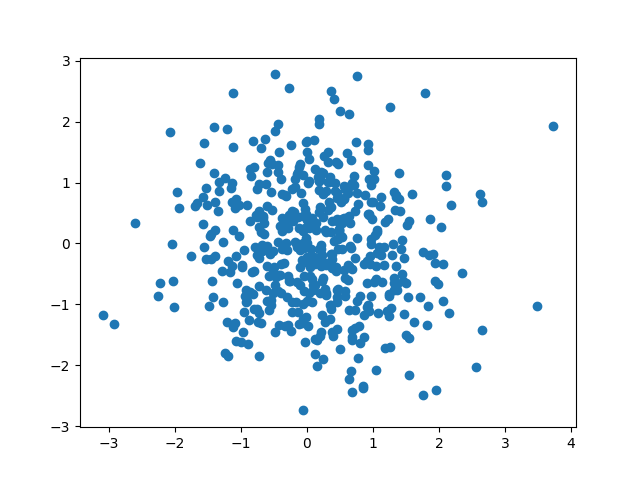

In [3]:
%pylab nbagg
ifig=1;close(ifig);figure(ifig)
a=random.standard_normal((2,500))
plot(a[0],a[1],'o')

In [4]:
def my_mean_var(x):
    N = len(x)
    m = sum(x)/N
    var = sum((x-m)**2)/(N-1)
    return m, var

In [5]:
my_mean_var(a[1])

(-0.041513212266466808, 1.0248983030305201)

## Least-Square fitting of arbitrary Curve

In [6]:
%pylab nbagg

Populating the interactive namespace from numpy and matplotlib


In [7]:
x = linspace(0, 5, 50)

<IPython.core.display.Javascript object>


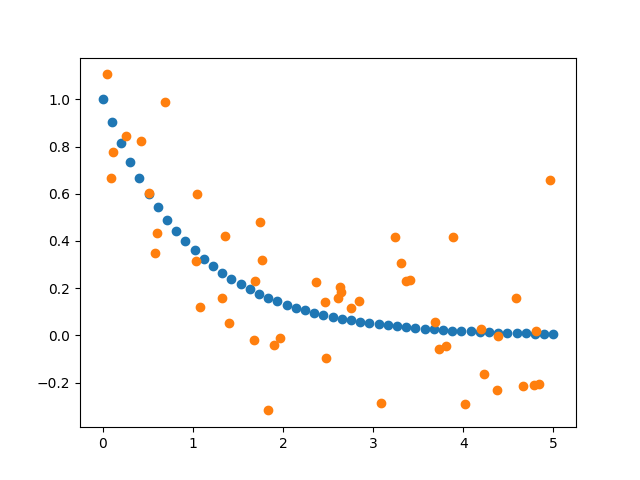

In [8]:
ifig = 5; close(ifig); figure(ifig)
def func_explore(x):
    return exp(-x)

plot(x, func_explore(x), 'o')

In [9]:
noise_level = 0.2
noisy_x=x+noise_level*randn(len(x))
noisy_y= func_explore(x)+noise_level*randn(len(x))
plot(noisy_x, noisy_y, 'o')

<IPython.core.display.Javascript object>


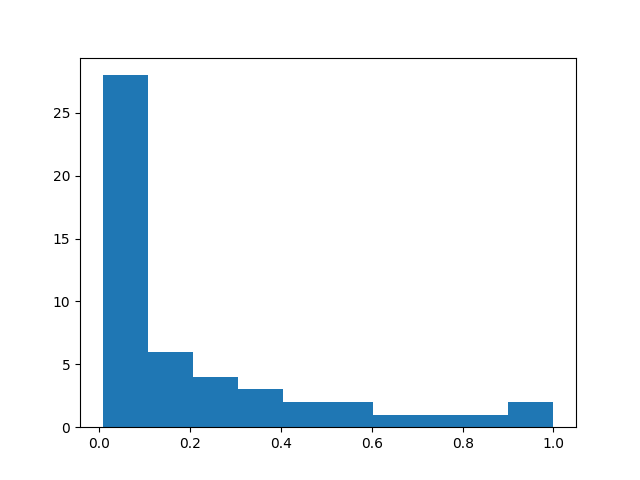

(array([ 28.,   6.,   4.,   3.,   2.,   2.,   1.,   1.,   1.,   2.]),
 array([ 0.00673795,  0.10606415,  0.20539036,  0.30471656,  0.40404277,
         0.50336897,  0.60269518,  0.70202138,  0.80134759,  0.90067379,  1.        ]),
 <a list of 10 Patch objects>)

In [10]:
ifig = 6; close(ifig); figure(ifig)
hist(func_explore(x), 10)

In [11]:
from scipy.optimize import curve_fit

In [13]:
def model_func(x, a, b, c):
    return a*x**3+b*x**2+c
fitpars, covmat = curve_fit(model_func, noisy_x, noisy_y, p0=[1.5, -1.5, 0.1])

In [14]:
variances = covmat.diagonal()
std_devs = np.sqrt(variances)
print(fitpars, std_devs)

[ 0.02232457 -0.12901503  0.58855101] [ 0.00612072  0.02943897  0.07329234]


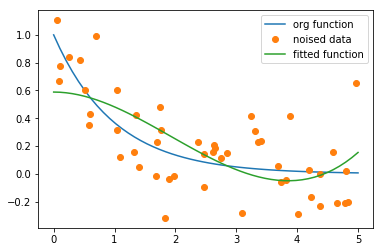

In [19]:
ifig = 7; close(ifig); figure(ifig)

plot(x, func_explore(x), label='org function')
plot(noisy_x, noisy_y, 'o', label = 'noised data')
plot(x, model_func(x, fitpars[0], fitpars[1], fitpars[2]), label='fitted function') ## fitted model function
legend(loc=0)